# Feature aggregation

### We will use the raw data and create some insightful features to interpret them


In [64]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# define data directories
data_dir = Path("../data/cleaned")
out_dir = Path("../data/aggregated"); out_dir.mkdir(parents=True, exist_ok=True)


In [46]:
# load cleaned data
customers = pd.read_csv(data_dir / "customers_clean.csv", parse_dates=["EnrollmentDateOpening","CancellationDate"])
flights   = pd.read_csv(data_dir / "flights_clean.csv", parse_dates=["YearMonthDate"])

print(customers.shape, flights.shape)
display(customers.head(3))
display(flights.head(3))


(16574, 22) (596664, 10)


,index,Loyalty,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType,IsActive
0,0,480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,...,Bachelor,Urban,70146.0,Married,Star,2019-02-15,NaN,3839.14,Standard,1
1,1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,...,College,Rural,0.0,Divorced,Star,2019-03-09,NaN,3839.61,Standard,1
2,2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,College,Urban,0.0,Single,Star,2017-07-14,1/8/2021,3839.75,Standard,0


,Loyalty,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
0,413052,2021,12,2021-12-01,2,2,9384.0,938.0,0.0,0.0
1,464105,2021,12,2021-12-01,0,0,0.0,0.0,0.0,0.0
2,681785,2021,12,2021-12-01,10,3,14745.0,1474.0,0.0,0.0


## Explain the first Step: 
### Tenure Days Issue how many days are they enrolled in the loyalty program

In [47]:

# todays date normalized (no time component) 
today = pd.Timestamp.today().normalize()


# Print the datetyp of cancelation date and enrollment date

print("CancellationDate dtype:", customers["CancellationDate"].dtype)
print("EnrollmentDateOpening dtype:", customers["EnrollmentDateOpening"].dtype)

# Feature Engineering
customers["EnrollmentDateOpening"] = pd.to_datetime(customers["EnrollmentDateOpening"], errors="coerce")
customers["CancellationDate"] = pd.to_datetime(customers["CancellationDate"], errors="coerce")


# 2) Define end date: use CancellationDate if present, otherwise today (normalized)
today_series = pd.Series(today, index=customers.index)
customers["EndDate"] = customers["CancellationDate"].combine_first(today_series)

# 3) Calculate CustomerTenureDays
customers["CustomerTenureDays"] = (customers["EndDate"] - customers["EnrollmentDateOpening"]).dt.days


CancellationDate dtype: object
EnrollmentDateOpening dtype: datetime64[ns]


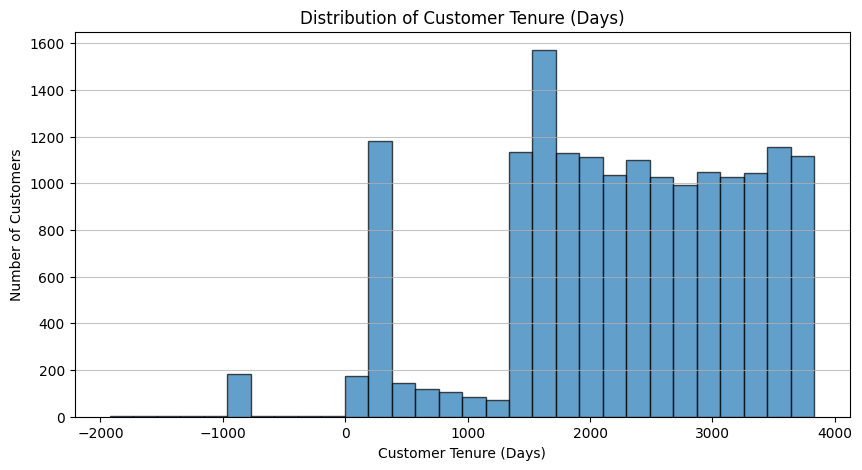

In [48]:
# Show histogram of CustomerTenureDays
plt.figure(figsize=(10,5))
plt.hist(customers["CustomerTenureDays"], bins=30, edgecolor='k', alpha=0.7)
plt.title("Distribution of Customer Tenure (Days)")
plt.xlabel("Customer Tenure (Days)")
plt.ylabel("Number of Customers")
plt.grid(axis='y', alpha=0.75)
plt.show()

In [49]:
# Show the Values which are negative in Tenure Days
neg_tenure = customers[customers["CustomerTenureDays"] < 0]
print("Customers with negative tenure days:")
display(neg_tenure)

Customers with negative tenure days:


,index,Loyalty,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType,IsActive,EndDate,CustomerTenureDays
71,72,357549,Elisha,Furna,Elisha Furna,Canada,British Columbia,Whistler,50.116322,-122.957360,...,60817.0,Single,Star,2021-09-21,2019-05-21,3964.73,Standard,0,2019-05-21,-854
76,77,265297,Ebonie,Radde,Ebonie Radde,Canada,Manitoba,Winnipeg,49.895138,-97.138374,...,39101.0,Married,Star,2021-07-17,2019-03-17,3978.67,Standard,0,2019-03-17,-853
172,176,845613,Jerald,Shiring,Jerald Shiring,Canada,Quebec,Montreal,45.501690,-73.567253,...,30598.0,Married,Star,2021-10-13,2019-06-13,4198.03,Standard,0,2019-06-13,-853
205,210,830547,Dortha,Detar,Dortha Detar,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,26245.0,Single,Star,2021-05-11,2019-01-11,4271.20,Standard,0,2019-01-11,-851
298,304,514900,Edith,Forslin,Edith Forslin,Canada,Ontario,Toronto,43.653225,-79.383186,...,80892.0,Married,Star,2021-07-20,2019-03-20,4425.91,Standard,0,2019-03-20,-853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16191,16514,584796,Julieann,Mclaughlan,Julieann Mclaughlan,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,59853.0,Single,Star,2021-08-18,2019-04-18,19454.41,Standard,0,2019-04-18,-853
16199,16522,774931,Cira,Defide,Cira Defide,Canada,British Columbia,Whistler,50.116322,-122.957360,...,33588.0,Married,Star,2021-07-21,2019-03-21,19731.34,Standard,0,2019-03-21,-853
16228,16551,275807,Arturo,Michaeli,Arturo Michaeli,Canada,Manitoba,Winnipeg,49.895138,-97.138374,...,71467.0,Divorced,Star,2021-10-18,2019-06-18,20446.60,Standard,0,2019-06-18,-853
16310,16634,433307,Lyndon,Vogelgesang,Lyndon Vogelgesang,Canada,Manitoba,Winnipeg,49.895138,-97.138374,...,80540.0,Married,Star,2021-08-03,2019-04-03,22758.91,Standard,0,2019-04-03,-853


In [50]:
# Show the enrollment and cancellation dates of these customers to understand the issue
display(neg_tenure[["Loyalty", "EnrollmentDateOpening", "CancellationDate", "CustomerTenureDays"]])

,Loyalty,EnrollmentDateOpening,CancellationDate,CustomerTenureDays
71,357549,2021-09-21,2019-05-21,-854
76,265297,2021-07-17,2019-03-17,-853
172,845613,2021-10-13,2019-06-13,-853
205,830547,2021-05-11,2019-01-11,-851
298,514900,2021-07-20,2019-03-20,-853
...,...,...,...,...
16191,584796,2021-08-18,2019-04-18,-853
16199,774931,2021-07-21,2019-03-21,-853
16228,275807,2021-10-18,2019-06-18,-853
16310,433307,2021-08-03,2019-04-03,-853


In [51]:
# Delete the negative tenure rows from customers
customers = customers[customers["CustomerTenureDays"] >= 0].copy()
print("After removing negative tenure days:", customers.shape)

After removing negative tenure days: (16375, 24)


We had to remove 200 customers, because they had negative tenure days which is not possible. This might be due to data entry errors or inconsistencies in the dataset. We will remove these rows to ensure the integrity of our analysis. We don't know the reason of this issue, but it is better to remove these rows for now.

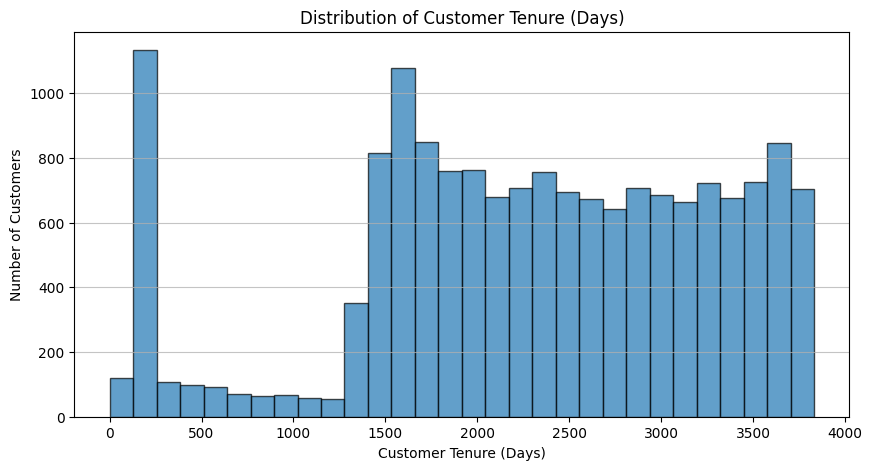

In [52]:
# Show histogram of CustomerTenureDays
plt.figure(figsize=(10,5))
plt.hist(customers["CustomerTenureDays"], bins=30, edgecolor='k', alpha=0.7)
plt.title("Distribution of Customer Tenure (Days)")
plt.xlabel("Customer Tenure (Days)")
plt.ylabel("Number of Customers")
plt.grid(axis='y', alpha=0.75)
plt.show()

In [53]:
# filter the dataset which had the longest tenure days
max_tenure = customers["CustomerTenureDays"].max()
longest_tenure_customers = customers[customers["CustomerTenureDays"] == max_tenure]
print(f"Customers with the longest tenure of {max_tenure} days:")
display(longest_tenure_customers)

Customers with the longest tenure of 3832 days:


,index,Loyalty,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType,IsActive,EndDate,CustomerTenureDays
6173,6305,597300,Scotty,Flecther,Scotty Flecther,Canada,Alberta,Edmonton,53.544388,-113.490930,...,52275.0,Married,Nova,2015-04-01,NaT,4982.68,Standard,1,2025-09-27,3832
7492,7646,574745,Shanika,Puga,Shanika Puga,Canada,Quebec,Montreal,45.501690,-73.567253,...,25318.0,Married,Nova,2015-04-01,NaT,7367.65,Standard,1,2025-09-27,3832
11788,12024,654073,Darcy,Babine,Darcy Babine,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,71126.0,Married,Star,2015-04-01,NaT,2854.11,Standard,1,2025-09-27,3832


### Next step: Create a new data set containing the customer data with additional features from aggregated data from flights.



In [68]:
# Show the flights of customer 100018
customer_100018_flights = flights[flights["Loyalty"] == 100018]
print("Flights of customer 100018:")
display(customer_100018_flights)

Flights of customer 100018:


,Loyalty,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
18209,100018,2020,5,2020-05-01,0,0,0.0,0.00,0.0,0.0
33978,100018,2020,4,2020-04-01,4,0,6243.0,624.00,0.0,0.0
57755,100018,2020,3,2020-03-01,14,3,13706.0,1370.00,3468.0,34.0
64961,100018,2020,2,2020-02-01,2,2,9915.0,991.00,0.0,0.0
76848,100018,2020,1,2020-01-01,3,0,12300.0,1230.00,0.0,0.0
93623,100018,2021,10,2021-10-01,6,4,23042.0,2304.00,2984.0,29.0
101859,100018,2021,11,2021-11-01,11,0,21916.0,2191.00,0.0,0.0
109607,100018,2021,6,2021-06-01,0,0,0.0,0.00,0.0,0.0
143809,100018,2021,5,2021-05-01,0,0,0.0,0.00,0.0,0.0
166357,100018,2021,12,2021-12-01,17,6,32572.0,3257.00,0.0,0.0


In [71]:
# Basic flight metrics per customer
flight_aggs = flights.groupby('Loyalty').agg(
    # Aggregated Values
    total_flights=('NumFlights', 'sum'),
    total_flights_with_companions=('NumFlightsWithCompanions', 'sum'), 
    total_distance=('DistanceKM', 'sum'),
    total_points_accumulated=('PointsAccumulated', 'sum'),
    total_points_redeemed=('PointsRedeemed', 'sum'),
    total_cost_redeemed=('DollarCostPointsRedeemed', 'sum'),
).reset_index()

print("Flight aggregations summary:")

# Add derived metrics
flight_aggs['points_redemption_ratio'] = (
    flight_aggs['total_points_redeemed'] / 
    flight_aggs['total_points_accumulated'].replace(0, np.nan)
).fillna(0)

flight_aggs['companion_flight_ratio'] = (
    flight_aggs['total_flights_with_companions'] / 
    flight_aggs['total_flights']
).fillna(0)

display(flight_aggs.head())


Flight aggregations summary:


,Loyalty,total_flights,total_flights_with_companions,total_distance,total_points_accumulated,total_points_redeemed,total_cost_redeemed,points_redemption_ratio,companion_flight_ratio
0,100018,225,45,530230.0,53014.30,20562.8,201.9,0.387873,0.200000
1,100102,245,55,339114.6,33903.96,18760.6,186.2,0.553345,0.224490
2,100140,211,51,432030.8,43192.58,4896.0,48.0,0.113353,0.241706
3,100214,108,17,364601.7,36453.77,12908.6,127.3,0.354109,0.157407
4,100272,181,50,429630.5,42953.25,10891.4,107.0,0.253564,0.276243


In [ ]:
# Export aggregated data (customer and flight)
flight_aggs.to_csv(out_dir / "flight_aggregations.csv", index=False)
customers.to_csv(out_dir / "customers_aggregations.csv", index=False)